In [95]:
from thinkbayes2 import Suite, Joint
import numpy as np
from itertools import product
import thinkplot
from scipy.stats import binom
% matplotlib inline

In [96]:
def EvalWeibullPdf(x, lam, k):
    """Computes the Weibull PDF.

    x: value
    lam: parameter lambda in events per unit time
    k: parameter

    returns: float probability density
    """
    arg = (x / lam)
    return k / lam * arg**(k-1) * np.exp(-arg**k)

def EvalWeibullCdf(x, lam, k):
    """Evaluates CDF of the Weibull distribution."""
    arg = (x / lam)
    return 1 - np.exp(-arg**k)

def MakeWeibullPmf(lam, k, high, n=200):
    """Makes a PMF discrete approx to a Weibull distribution.

    lam: parameter lambda in events per unit time
    k: parameter
    high: upper bound
    n: number of values in the Pmf

    returns: normalized Pmf
    """
    xs = np.linspace(0, high, n)
    ps = EvalWeibullPdf(xs, lam, k)
    return Pmf(dict(zip(xs, ps)))

In [107]:
class UnemploymentSurvivalDistributions(Suite, Joint):
     def Likelihood(self, data, hypo):
        lam, k, p = hypo
        if lam == 0:
            return 0
        flag, x = data
        if flag == 'eq':
            like = EvalWeibullPdf(x, lam, k)
        elif flag == 'gt':
            like = 1 - EvalWeibullCdf(x, lam, k)
        elif flag == 'lt':
            like = EvalWeibullCdf(x, lam, k)
        elif flag == 'pg': # employed pre-grad
            e, t = x.split("/")
            like = binom.pmf(int(e), int(t), p)
        else:
            raise ValueError('Invalid data')
        return like

In [108]:
# Use binomial for survival of unemployment before graduation
# Use Weibull for survival of unemployment after graduation

lams = np.linspace(0, 30, 101)
ks = np.linspace(0, 100, 101)
p = np.linspace(0, 1, 20)
# class of 2012 graduating data
# 69 students
# 50 employed at grad
# 4 more employed after 5 months
# 13 unemployed at 5 months
d_2012 = {("lt", 5): 4, ("gt", 5): 13, ("pg", "50/69"): 1}

distr = UnemploymentSurvivalDistributions(product(lams, ks, p))
ds = []
for x in d_2012:
    for _ in range(d_2012[x]):
        ds.append(x)
distr.UpdateSet(ds)

50 69 0.947368421053
50 69 0.421052631579
50 69 0.894736842105
50 69 0.421052631579
50 69 0.421052631579
50 69 0.421052631579
50 69 0.315789473684
50 69 0.631578947368
50 69 0.210526315789
50 69 0.263157894737
50 69 0.263157894737
50 69 0.473684210526
50 69 0.263157894737
50 69 0.0526315789474
50 69 1.0
50 69 0.0526315789474
50 69 0.0526315789474
50 69 0.789473684211
50 69 1.0
50 69 0.631578947368
50 69 0.0
50 69 0.263157894737
50 69 0.0
50 69 0.157894736842
50 69 0.105263157895
50 69 0.894736842105
50 69 0.736842105263
50 69 0.0526315789474
50 69 0.421052631579
50 69 0.894736842105
50 69 0.473684210526
50 69 0.473684210526
50 69 0.631578947368
50 69 0.210526315789
50 69 0.263157894737
50 69 0.578947368421
50 69 0.789473684211
50 69 0.0
50 69 0.263157894737
50 69 0.526315789474
50 69 0.631578947368
50 69 0.473684210526
50 69 0.578947368421
50 69 0.578947368421
50 69 0.368421052632
50 69 0.210526315789
50 69 0.315789473684
50 69 0.368421052632
50 69 0.578947368421
50 69 0.684210526316
5

2.4971317274127113e-08

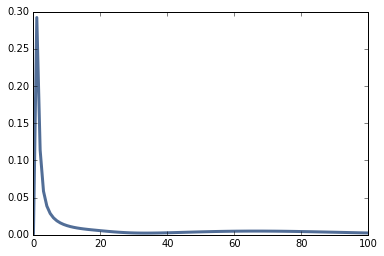

In [109]:
pmf_k = distr.Marginal(1)
thinkplot.Pdf(pmf_k)

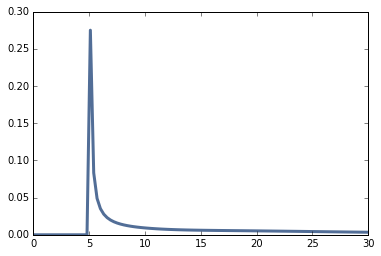

In [110]:
pmf_lam = distr.Marginal(0)
thinkplot.Pdf(pmf_lam)

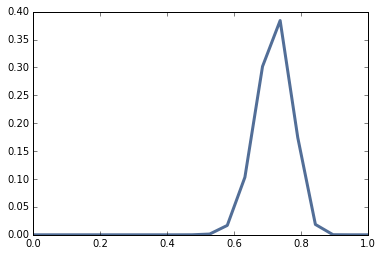

In [111]:
pmf_p = distr.Marginal(2)
thinkplot.Pdf(pmf_p)

In [126]:
prob = 0
for hypo in distr:
    lam, k, p = hypo
    prob += distr[hypo] * p
    
print("Probability of a student being employed at 9 months:", prob)

Probability of a student being employed at 9 months: 0.718309680583


In [127]:
prob = 0
for hypo in distr:
    lam, k, p = hypo
    prob += distr[hypo] * p
    prob += distr[hypo] * (EvalWeibullCdf(12, lam, k) - EvalWeibullCdf(9, lam, k))
    
print("Probability of a student being employed at 12 months:", prob)

Probability of a student being employed at 12 months: 0.783740354857


In [128]:
prob = 0
for hypo in distr:
    lam, k, p = hypo
    prob += distr[hypo] * p
    prob += distr[hypo] * (EvalWeibullCdf(24, lam, k) - EvalWeibullCdf(9, lam, k))
    
print("Probability of a student being employed at 24 months:", prob)

Probability of a student being employed at 24 months: 0.890948161062


In [129]:
for i in range(24):
    prob = 0
    for hypo in distr:
        lam, k, p = hypo
        if (i <= 9):
            prob += distr[hypo] * p
        else:
            prob += distr[hypo] * p
            prob += distr[hypo] * (EvalWeibullCdf(i, lam, k) - EvalWeibullCdf(9, lam, k))
        
    print(i, prob)

0 0.718309680583
1 0.718309680583
2 0.718309680583
3 0.718309680583
4 0.718309680583
5 0.718309680583
6 0.718309680583
7 0.718309680583
8 0.718309680583
9 0.718309680583
10 0.744360863133
11 0.765730216499
12 0.783740354857
13 0.799213825596
14 0.812701130808
15 0.824590667993
16 0.835167357183
17 0.844646703669
18 0.853196050488
19 0.860948416904
20 0.868011682297
21 0.874474759474
22 0.880411827742
23 0.885885327314
